In [12]:
# import cv2
# import torch
import random
import time
import numpy as np
import tensorrt as trt
# from PIL import Image
from pathlib import Path 
from collections import OrderedDict,namedtuple

In [13]:
# import pycuda.driver as cuda
# import pycuda.autoinit


In [14]:
# import cupy as cp
# import numpy as np
# import cv2 

# img = cv2.imread('/py/crop/9/3.jpg')

# pinned_memory_pool = cp.cuda.PinnedMemoryPool()
# cp.cuda.set_pinned_memory_allocator(pinned_memory_pool.malloc)


# def _pin_memory(array):
#     mem = cp.cuda.alloc_pinned_memory(array.nbytes)
#     ret = np.frombuffer(mem, array.dtype, array.size).reshape(array.shape)
#     ret[...] = array
#     return ret




# # SIZE = 1920 * 1080 *3
# # x_cpu_src = np.arange(SIZE, dtype=np.uint8)
# x_cpu_src = cv2.imread('/py/crop/9/3.jpg')
# print(x_cpu_src.shape,x_cpu_src.size)
# x_gpu_src = cp.arange(x_cpu_src.size, dtype=np.uint8).reshape(x_cpu_src.shape)


# # # synchronous
# # stream = cp.cuda.Stream.null
# # start = stream.record()
# # x_gpu_dst = cp.empty(x_cpu_src.shape, x_cpu_src.dtype)
# # x_gpu_dst.set(x_cpu_src)
# # x_cpu_dst = x_gpu_src.get()
# # end = stream.record()

# # print('Synchronous Device to Host / Host to Device (ms)')
# # print(cp.cuda.get_elapsed_time(start, end))

# # asynchronous
# x_gpu_dst = cp.empty(x_cpu_src.shape, x_cpu_src.dtype)
# x_cpu_dst = np.empty(x_gpu_src.shape, x_gpu_src.dtype)

# x_pinned_cpu_src = _pin_memory(x_cpu_src)
# x_pinned_cpu_dst = _pin_memory(x_cpu_dst)

# with cp.cuda.stream.Stream() as stream_htod:
#     start = stream_htod.record()
#     x_gpu_dst.set(x_pinned_cpu_src)
#     with cp.cuda.stream.Stream() as stream_dtoh:
#         x_gpu_src.get(out=x_pinned_cpu_dst)
#         stream_dtoh.synchronize()
#     stream_htod.synchronize()
#     end = stream_htod.record()

# print('Asynchronous Device to Host / Host to Device (ms)')
# print(cp.cuda.get_elapsed_time(start, end))

In [15]:
import numpy as np

import cupy as cp
from nvjpeg import NvJpeg

nj = NvJpeg()
img = nj.read('/py/crop/9/3.jpg')


pinned_memory_pool = cp.cuda.PinnedMemoryPool()
cp.cuda.set_pinned_memory_allocator(pinned_memory_pool.malloc)


def _pin_memory(array):
    mem = cp.cuda.alloc_pinned_memory(array.nbytes)
    ret = np.frombuffer(mem, array.dtype, array.size).reshape(array.shape)
    ret[...] = array
    return ret

img_device = cp.empty(img.shape, img.dtype)
# img_pinned_gpu_dst = _pin_memory(img)

with cp.cuda.stream.Stream() as stream_htod:
    start = stream_htod.record()
    img_device.set(img)
    stream_htod.synchronize()
    end = stream_htod.record()
print('Asynchronous Host to Device (ms)')
print(cp.cuda.get_elapsed_time(start, end))


Asynchronous Host to Device (ms)
0.2829760015010834


In [6]:
# !pip3 install pycuda cupy-cuda11x pynvjpeg line_profiler 

In [7]:
# from nvjpeg import NvJpeg
# nj = NvJpeg()
# img = nj.read('/py/crop/9/3.jpg')


In [8]:
# import cv2
# from line_profiler import LineProfiler
# profile = LineProfiler()

# @profile
# def inner_nj():
#     img = nj.read('/py/crop/9/3.jpg')
# #     img = nj.read('/py/crop/9/3.jpg')
#     nj_jpg = nj.encode(img)
    
# @profile
# def inner_cv2():
#     img = cv2.imread('/py/crop/9/3.jpg')
#     nj_jpg = cv2.imencode('.jpg',img)[1]

# for _ in range(1000):
#     inner_nj()
#     inner_cv2()
# profile.print_stats()

In [9]:
!nvidia-smi

Tue Sep 27 22:18:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 470.63.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:09:00.0 Off |                  N/A |
| 31%   32C    P2    54W / 300W |    380MiB / 11016MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
!ls /usr/local/

bin   cuda-11	 cuda-11.4  games    lib  mpi  sbin   src
cuda  cuda-11.3  etc	    include  man  nvm  share  ucx


In [11]:
# !python /py/yolov7/tools/tensorrt-python/export.py -o /py/best.onnx -e /py/best.trt -p fp16

Namespace(calib_batch_size=8, calib_cache='./calibration.cache', calib_input=None, calib_num_images=5000, conf_thres=0.4, end2end=False, engine='/py/best.trt', iou_thres=0.5, max_det=100, onnx='/py/best.onnx', precision='fp16', verbose=False, workspace=1)
[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +321, GPU +0, now: CPU 342, GPU 695 (MiB)
[TensorRT] WARNING: onnx2trt_utils.cpp:362: Your ONNX model has been generated with INT64 weights, while TensorRT does not natively support INT64. Attempting to cast down to INT32.
[TensorRT] WARNING: onnx2trt_utils.cpp:390: One or more weights outside the range of INT32 was clamped
[TensorRT] INFO: No importer registered for op: EfficientNMS_TRT. Attempting to import as plugin.
[TensorRT] INFO: Searching for plugin: EfficientNMS_TRT, plugin_version: 1, plugin_namespace: 
[TensorRT] INFO: Successfully created plugin: EfficientNMS_TRT
Network Description
Input 'images' with shape (1, 3, 640, 640) and dtype DataType.FLOAT
Output 'num_dets' with sh

In [1]:
import time
import numpy as np
import tensorrt as trt
from pathlib import Path
from collections import OrderedDict,namedtuple

In [5]:
import numpy as np

import cupy as cp
from nvjpeg import NvJpeg

nj = NvJpeg()
img = nj.read('/py/crop/9/3.jpg')


pinned_memory_pool = cp.cuda.PinnedMemoryPool()
cp.cuda.set_pinned_memory_allocator(pinned_memory_pool.malloc)


def _pin_memory(array):
    mem = cp.cuda.alloc_pinned_memory(array.nbytes)
    ret = np.frombuffer(mem, array.dtype, array.size).reshape(array.shape)
    ret[...] = array
    return ret, mem # array, mem_ptr

img_device = cp.empty(img.shape, img.dtype)
# img_pinned_gpu_dst = _pin_memory(img)

with cp.cuda.stream.Stream() as stream_htod:
    start = stream_htod.record()
    img_device.set(img)
    stream_htod.synchronize()
    end = stream_htod.record()
print('Asynchronous Host to Device (ms)')
print(cp.cuda.get_elapsed_time(start, end))


Asynchronous Host to Device (ms)
0.2040960043668747


In [ ]:
class Engine:
    def __init__(self):
        with open('/py/best.trt', 'rb') as f, trt.Runtime(logger) as runtime:
            self.engine = runtime.deserialize_cuda_engine(f.read())
        self.stream = cp.cuda.Stream(non_blocking=False)

    def infer(self, _input):
        bindings = []
        for index, data in enumerate(_input):
            self.context.set_binding_shape(index, data.shape)
            bindings.append(int(data.data))

        outputs = []
        for binding in self.engine:
            if not self.engine.binding_is_input(binding):
                device_mem = cp.zeros(self.context.get_binding_shape(self.engine.get_binding_index(binding)), dtype=cp.float32)

                bindings.append(int(device_mem.data))
                outputs.append(device_mem)

        self.context.execute_async(batch_size=1, 
                                   bindings=bindings, 
                                   stream_handle=self.stream.ptr)
#         self.context.execute_async(batch_size=len(inputs),
#                        bindings=self.bindings,
#                        stream_handle=self.stream.handle)
        self.stream.synchronize()
engine = Engine()

In [4]:
# Infer TensorRT Engine
Binding = namedtuple('Binding', ('name', 'dtype', 'shape', 'data', 'ptr'))
logger = trt.Logger(trt.Logger.INFO)
trt.init_libnvinfer_plugins(logger, namespace="")
with open('/py/best.trt', 'rb') as f, trt.Runtime(logger) as runtime:
    model = runtime.deserialize_cuda_engine(f.read())
print(model)

bindings = OrderedDict()

for index in range(model.num_bindings):
    name = model.get_binding_name(index)
    dtype = trt.nptype(model.get_binding_dtype(index))
    shape = tuple(model.get_binding_shape(index))
    data = img_device
    data_ptr = cp.cuda.PinnedMemoryPointer(img_device,0)
#     data = torch.from_numpy(np.empty(shape, dtype=np.dtype(dtype))).to(device)
#     bindings[name] = Binding(name, dtype, shape, data, int(data.data_ptr()))
    bindings[name] = Binding(name, dtype, shape, img_device, data_ptr)
binding_addrs = OrderedDict((n, d.ptr) for n, d in bindings.items())
context = model.create_execution_context()


def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

# def postprocess(boxes,r,dwdh):
#     dwdh = torch.tensor(dwdh*2).to(boxes.device)
#     boxes -= dwdh
#     boxes /= r
#     return boxes

# names = [0,1,2,3,4,5,6,7,8]
# colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

[TensorRT] WARNING: The logger passed into createInferRuntime differs from one already provided for an existing builder, runtime, or refitter. TensorRT maintains only a single logger pointer at any given time, so the existing value, which can be retrieved with getLogger(), will be used instead. In order to use a new logger, first destroy all existing builder, runner or refitter objects.

[TensorRT] INFO: [MemUsageChange] Init CUDA: CPU +0, GPU +0, now: CPU 1217, GPU 1010 (MiB)
[TensorRT] INFO: Loaded engine size: 82 MB
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine begin: CPU 1300 MiB, GPU 1010 MiB


[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +8, now: CPU 1312, GPU 1094 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuDNN: CPU +0, GPU +8, now: CPU 1312, GPU 1102 (MiB)
[TensorRT] INFO: [MemUsageChange] Init cuBLAS/cuBLASLt: CPU +0, GPU +0, now: CPU 1312, GPU 1086 (MiB)
[TensorRT] INFO: [MemUsageSnapshot] deserializeCudaEngine end: CPU 1312 MiB, GPU 1086 MiB


AttributeError: 'ndarray' object has no attribute 'ptr'

In [119]:
image = img.copy()
image, ratio, dwdh = letterbox(image, auto=False)
image = image.transpose((2, 0, 1))
image = np.expand_dims(image, 0)
image = np.ascontiguousarray(image)

im = image.astype(np.float32)
im = np.tile(im,[128,1,1,1])
im.shape

(128, 3, 640, 640)

Cost 0.3291233240161091 s, avg 38891.19690397116


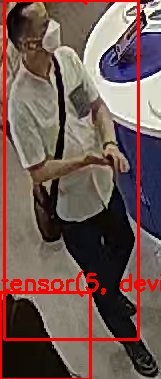

In [120]:
im = torch.from_numpy(im).to(device)
im/=255
im.shape

# warmup for 10 times
for _ in range(10):
    tmp = torch.randn(1,3,640,640).to(device)
    binding_addrs['images'] = int(tmp.data_ptr())
    context.execute_v2(list(binding_addrs.values()))

start = time.perf_counter()

loops = 100
batch =128
for i in range(loops):
    binding_addrs['images'] = int(im.data_ptr())
    context.execute_v2(list(binding_addrs.values()))
diff = time.perf_counter()-start
print(f'Cost {diff} s, avg {(loops*batch/diff)}')

nums = bindings['num_dets'].data
boxes = bindings['det_boxes'].data
scores = bindings['det_scores'].data
classes = bindings['det_classes'].data
nums.shape,boxes.shape,scores.shape,classes.shape

boxes = boxes[0,:nums[0][0]]
scores = scores[0,:nums[0][0]]
classes = classes[0,:nums[0][0]]

for box,score,cl in zip(boxes,scores,classes):
    box = postprocess(box,ratio,dwdh).round().int()
    name = str(cl)
    color = (255,0,0)
    name += ' ' + str(round(float(score),3))
    cv2.rectangle(img,tuple(box[:2].tolist()),tuple(box[2:].tolist()),color,2)
    cv2.putText(img,name,(int(box[0]), int(box[1]) - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,color,thickness=2)
Image.fromarray(img)